In [1]:
import pandas as pd

In [2]:
df = pd .read_csv('/kaggle/input/emotion-analysis-based-on-text/emotion_sentimen_dataset.csv', encoding='utf-8')

In [3]:
df.head()

,Unnamed: 0,text,Emotion
0,0,i seriously hate one subject to death but now ...,hate
1,1,im so full of life i feel appalled,neutral
2,2,i sit here to write i start to dig out my feel...,neutral
3,3,ive been really angry with r and i feel like a...,anger
4,4,i feel suspicious if there is no one outside l...,neutral


In [4]:
df.tail()

,Unnamed: 0,text,Emotion
839550,839550,i feel like telling these horny devils to find...,neutral
839551,839551,i began to realize that when i was feeling agi...,neutral
839552,839552,i feel very curious be why previous early dawn...,neutral
839553,839553,i feel that becuase of the tyranical nature of...,neutral
839554,839554,i think that after i had spent some time inves...,neutral


In [5]:
df.columns

Index(['Unnamed: 0', 'text', 'Emotion'], dtype='object')

In [ ]:
del df['Unnamed: 0']

In [ ]:
df.head()

In [ ]:
df.isnull().any()

In [ ]:
df.isnull().sum()

In [7]:
df.describe()

,Unnamed: 0
count,839555.000000
mean,419777.000000
std,242358.796962
min,0.000000
25%,209888.500000
50%,419777.000000
75%,629665.500000
max,839554.000000


In [ ]:
df['Emotion'].value_counts()

In [6]:
df.shape

(839555, 3)

# **Visuatization**

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

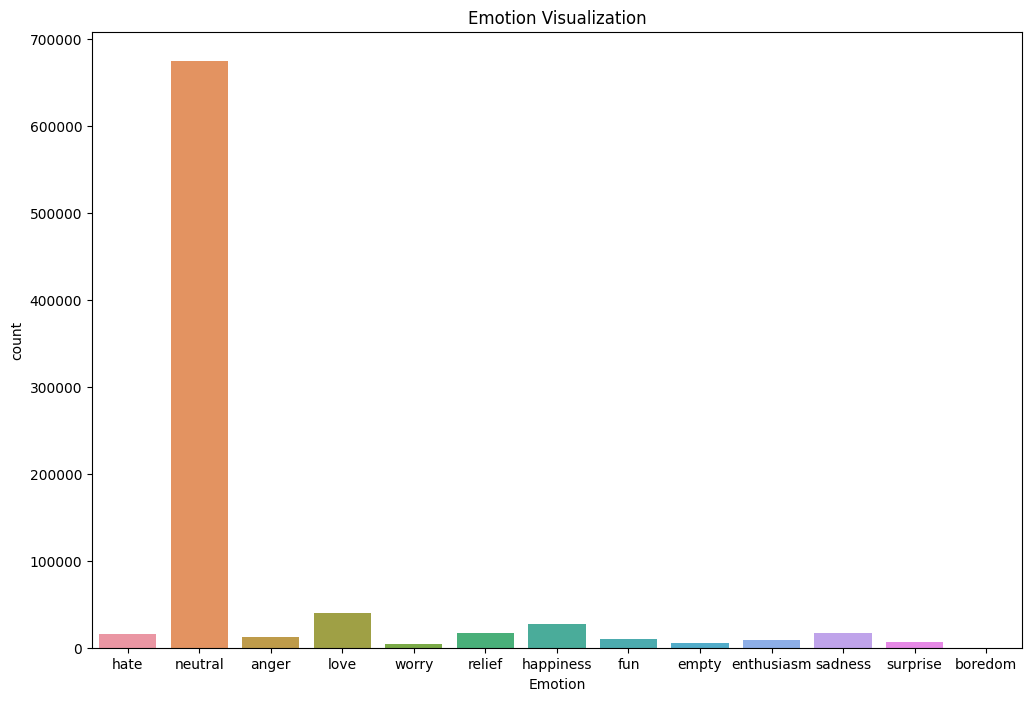

In [9]:
plt.figure(figsize=(12, 8))
sns.countplot(x='Emotion', data=df)
plt.title('Emotion Visualization')
plt.show()

# **Text Normalization**

**Tokenization**

In [10]:
# Import data science libraries
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize

In [ ]:
!pip install toktok

In [ ]:
import spacy
import re
import string
import unicodedata
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from textblob import TextBlob
from textblob import Word
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix
from bs4 import BeautifulSoup

In [ ]:
nltk.download('stopwords')

In [ ]:
from nltk.corpus.reader.tagged import ToktokTokenizer
tokenizers = ToktokTokenizer()
stopwords = nltk.corpus.stopwords.words('english')

In [ ]:
def noiseremovel_text(text):
  soup = BeautifulSoup(text, "html.parser")
  text = soup.get_text()
  text = re.sub('\[[^]]*\]', '',text)
  return text

In [ ]:
df['text'] = df['text'].apply(noiseremovel_text)

In [ ]:
df.head()

# **Stemming**

In [ ]:
def stemmer(text):
  ps = nltk.porter.PorterStemmer()
  text = '.'.join([ps.stem(word) for word in text.split()])
  return text

In [ ]:
df['text'] = df['text'].apply(stemmer)

In [ ]:
df.head()

In [ ]:
import pandas as pd
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import ToktokTokenizer

# Assuming you have a DataFrame named 'df' with a column 'review'

# Download the necessary data
nltk.download('punkt')
nltk.download('stopwords')

# Function to remove stopwords from text
def remove_stopwords(text, stop_words=None, is_lower_case=False):
    # Create a ToktokTokenizer instance
    tokenizers = ToktokTokenizer()

    # Use a regular expression to split the text into words while preserving consecutive full-stop signs
    words = re.findall(r'\w+|\.\.+', text)

    # Remove stopwords
    if stop_words is None:
        stop_words = set()
    else:
        stop_words = set(stop_words)

    if is_lower_case:
        # Remove stopwords without converting tokens to lowercase
        filtokens = [i for i in words if i not in stop_words]
    else:
        # Remove stopwords after converting tokens to lowercase
        filtokens = [i for i in words if i.lower() not in stop_words]

    # Join the filtered words back into a sentence
    filtered_text = ' '.join(filtokens)
    return filtered_text

# Now, apply the remove_stopwords function to the 'review' column of the DataFrame

# Get the English stopwords
stop_wr = set(stopwords.words('english'))

# Apply the remove_stopwords function to the 'review' column of the DataFrame
df['text'] = df['text'].apply(remove_stopwords, stop_words=stop_wr)


In [ ]:
df.head()

# **Traning Test Split**

In [ ]:
X = df.text[:629665]

In [ ]:
y = df.text[629665:]

# **Bag of Words**

In [ ]:
cv = CountVectorizer(min_df=0,max_df=1,binary=False,ngram_range=(1,3))
cv_train = cv.fit_transform(X)
cv_test = cv.fit_transform(y)
print('Bow_cv_train',cv_train.shape)
print('Bow_cv_test',cv_test.shape)

# **TE_IDF**

In [ ]:
tf = TfidfVectorizer(min_df=0,max_df=1,binary=False,ngram_range=(1,3))
tf_train = tf.fit_transform(X)
tf_test = tf.fit_transform(y)
print('Bow_tf_train',tf_train.shape)
print('Bow_tf_test',tf_test.shape)

# **Label_Encoding**

In [ ]:
# Create a LabelBinarizer instance
label_binarizer = LabelBinarizer()

# Fit and transform the 'sentiment' column
emotion_encoded = label_binarizer.fit_transform(df['Emotion'])
print(emotion_encoded.shape)

In [ ]:
emotion_encoded

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
# Create a CountVectorizer instance
vectorizer = CountVectorizer()

# Convert the text data to bag-of-words features
X_bow = vectorizer.fit_transform(df['text'])

# Split the data into features (X) and target (y)
X_train, X_test, y_train, y_test = train_test_split(X_bow, df['Emotion'], test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
logistic = LogisticRegression(penalty='l2', max_iter=500, C=1, random_state=42)

# Fitting the model on the training data
lr_bow = logistic.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lr_bow.predict(X_test)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


In [ ]:
# Make predictions on new text data
new_text = ["Im not crying, it's just been raining... on my face."]
new_text_bow = vectorizer.transform(new_text)
y_pred = lr_bow.predict(new_text_bow)

print("Predicted Sentiment:", y_pred[0])